In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
path=r"C:\Users\win10\Desktop\DATA SCIENCE\ExcelR\Assignment Given (Untouched)\9)KNN\Assignment Given\glass.csv"

In [7]:
path=path.replace('\\', '/')

In [8]:
df=pd.read_csv(path)

In [9]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D18D5BB08>,
      dtype=object)

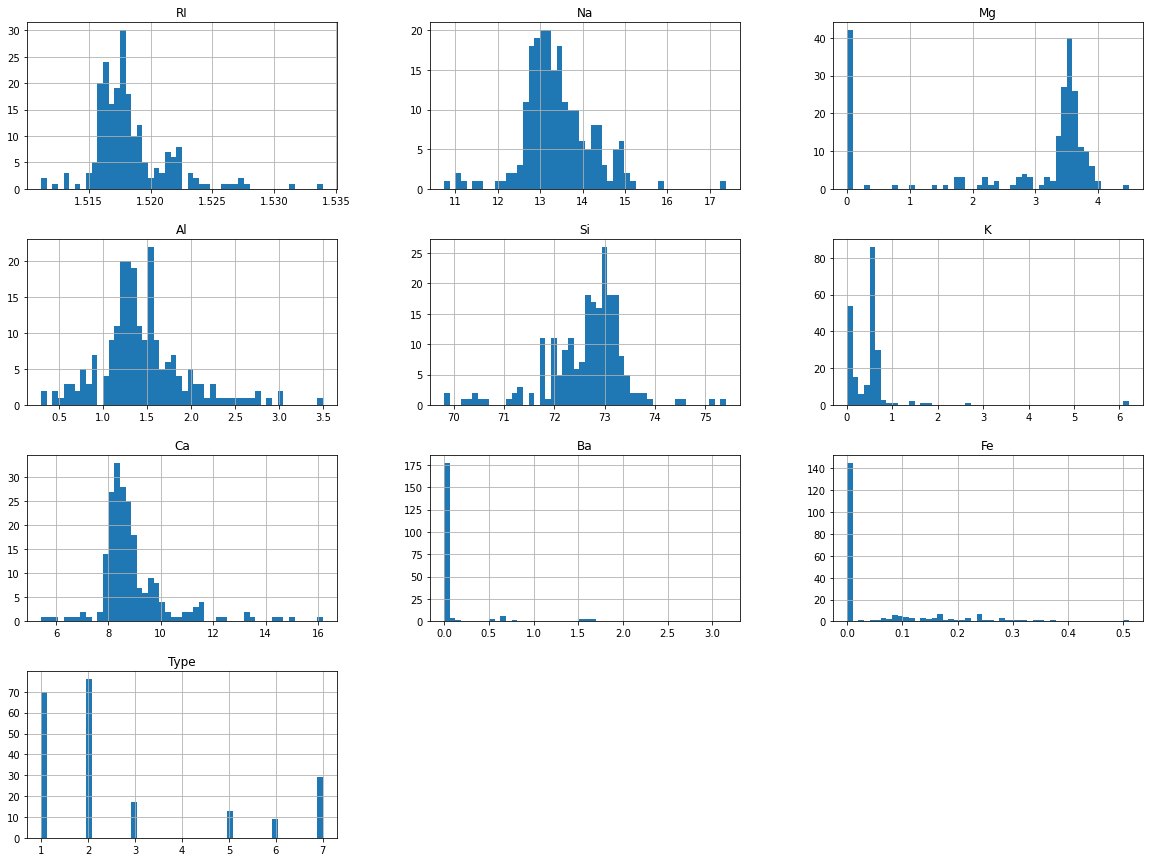

In [10]:
df.hist(bins=50, figsize=(20,15))

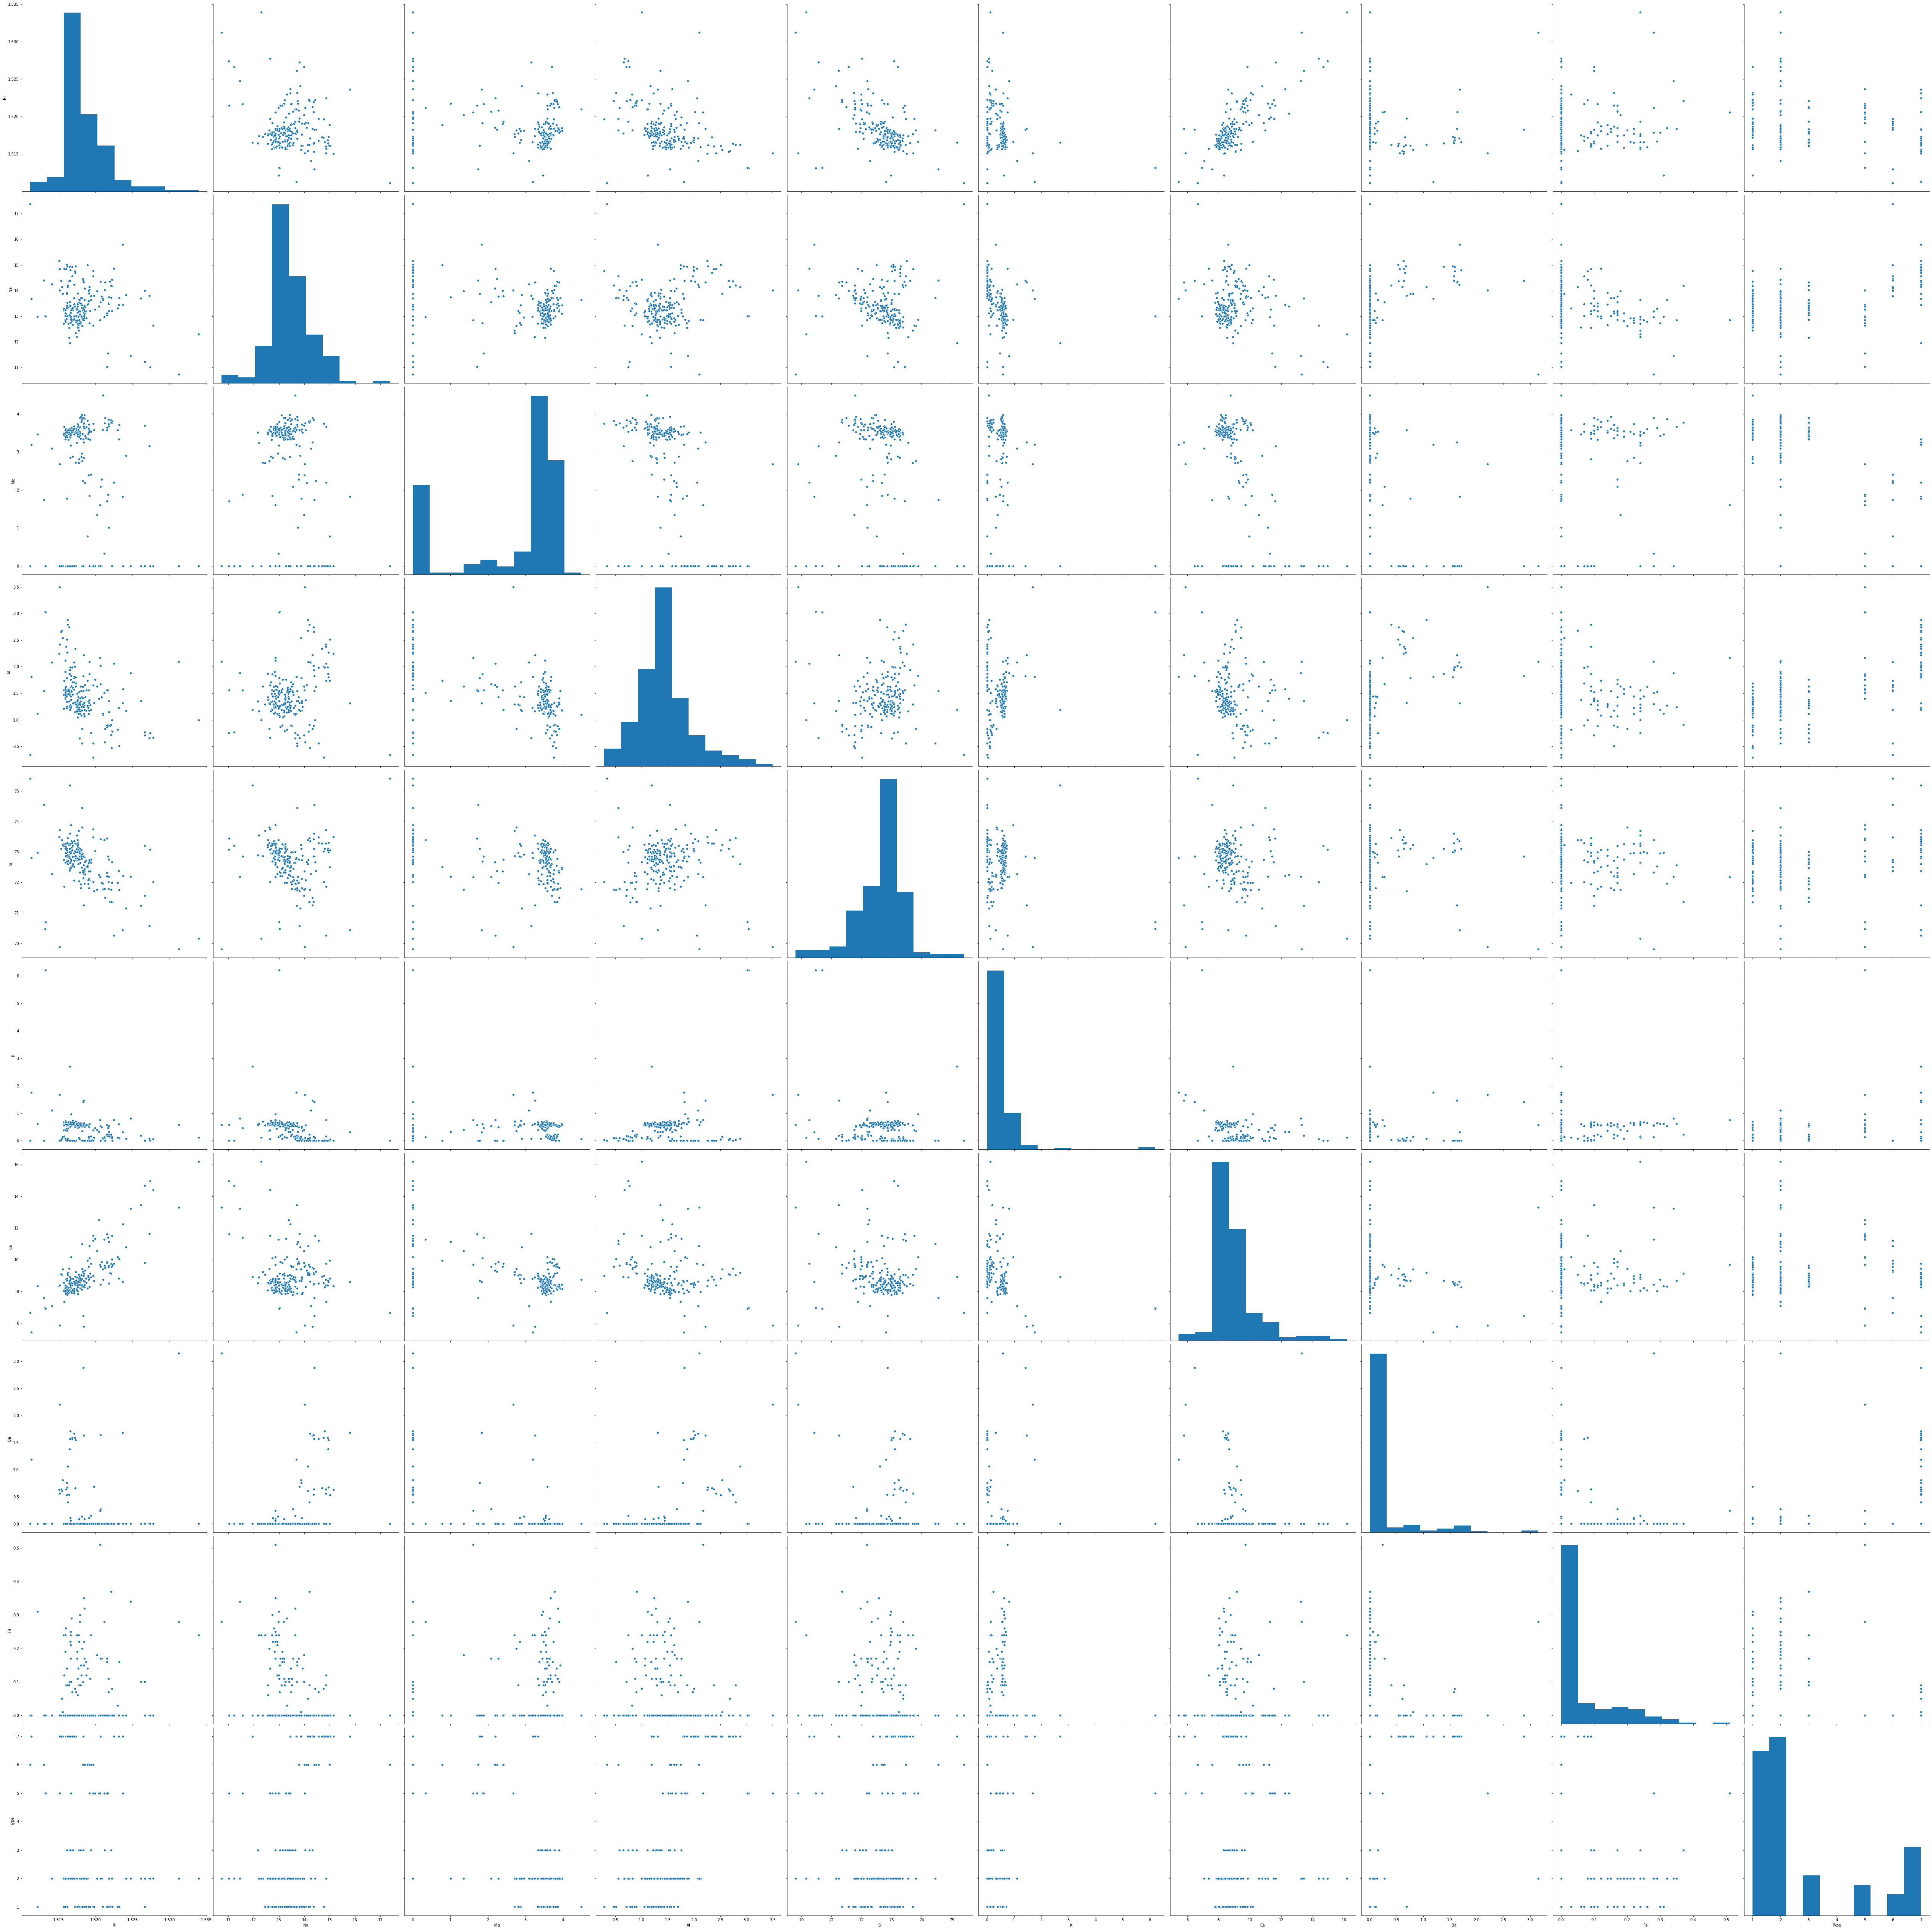

In [11]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [13]:
#converting the data to array for plotting.
X = np.array(df.iloc[:,3:5])

In [14]:
y = np.array(df['Type'])

In [29]:
# customer color maps

In [15]:
from matplotlib.colors import ListedColormap
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

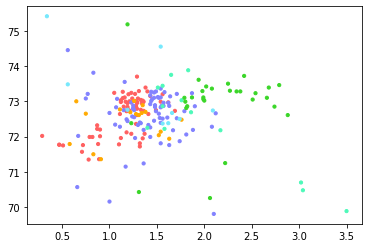

In [16]:
# Create color maps
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)

In [17]:
#Try plots using seaborn
# sns.swarmplot(x='Na',y='RI',data=df,hue='Type')

In [18]:
# creating training set, test set and checking shapes
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [20]:
# Using KNN to classify the glasses
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Predicting results using KNN fit.
pred = knn.predict(X_train)

In [23]:
#computing confusion matrix
from sklearn.metrics import confusion_matrix

In [25]:
cnf_matrix = confusion_matrix(y_train,pred)

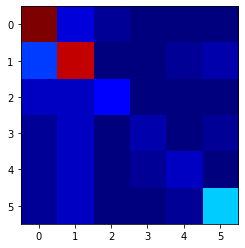

In [26]:
#plotting the matrix in with plotly
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

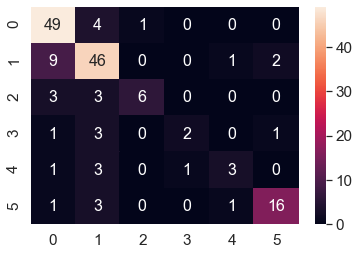

In [27]:
#visualizing the confusion matrix
df_cm = pd.DataFrame(cnf_matrix, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [30]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [34]:
acc=[]
for i in range(3, 50, 2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_acc = np.mean(neigh.predict(X_train) == y_train)
    test_acc = np.mean(neigh.predict(X_test) == y_test)
    acc.append([train_acc, test_acc])


In [35]:
acc

[[0.7625, 0.5925925925925926],
 [0.7125, 0.5555555555555556],
 [0.6625, 0.5370370370370371],
 [0.64375, 0.5370370370370371],
 [0.6375, 0.5555555555555556],
 [0.64375, 0.5370370370370371],
 [0.64375, 0.5740740740740741],
 [0.625, 0.5370370370370371],
 [0.63125, 0.5185185185185185],
 [0.63125, 0.5],
 [0.625, 0.5185185185185185],
 [0.61875, 0.5370370370370371],
 [0.575, 0.48148148148148145],
 [0.58125, 0.5],
 [0.56875, 0.5],
 [0.56875, 0.5],
 [0.56875, 0.5185185185185185],
 [0.55625, 0.5370370370370371],
 [0.55, 0.5185185185185185],
 [0.49375, 0.4444444444444444],
 [0.48125, 0.42592592592592593],
 [0.48125, 0.4444444444444444],
 [0.475, 0.46296296296296297],
 [0.44375, 0.4444444444444444]]

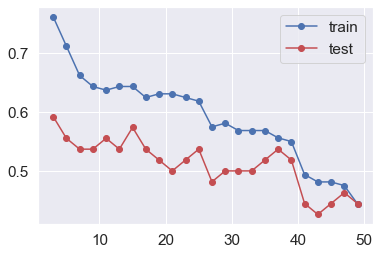

In [40]:
# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")
plt.legend(["train","test"])

In [ ]:
# plotting the decision boundries for the data
h = .02  # step size in the mesh
n_neighbors = 5 # No of neighbours 

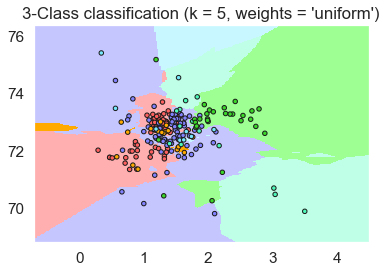

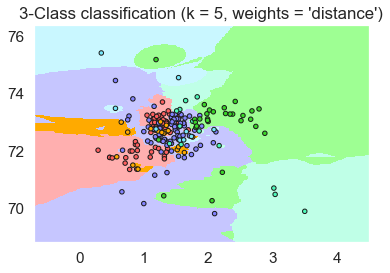

In [45]:

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))